<a href="https://colab.research.google.com/github/danayang1120/BetterDays/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 37 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [2]:
# Sklearn and Pandas Setup

import pandas as pd
print(pd.__version__ == '1.1.5')
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from sklearn.preprocessing import LabelEncoder

True


In [3]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa

In [4]:
co2_df = pd.read_csv('/content/drive/MyDrive/CIS 545/545 Project/global_average_yearly_temp_with_features_clean.csv')
co2_df.head(5)

,iso_code,year,oil_co2_per_capita,oil_co2,share_global_oil_co2,cumulative_oil_co2,share_global_cumulative_oil_co2,co2_growth_abs,co2_per_capita,co2,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_growth_prct,population,AvgYearlyTemp
0,FRA,1855,0.001,0.037,100.00,0.037,100.00,3.858,0.899,33.071,12.71,469.655,7.96,13.21,36768948.0,11.763583
1,FRA,1856,0.001,0.040,100.00,0.077,100.00,1.561,0.940,34.632,12.49,504.287,8.17,4.72,36853256.0,12.615917
2,FRA,1857,0.001,0.044,85.71,0.121,94.29,0.649,0.955,35.281,12.61,539.568,8.36,1.87,36937755.0,12.823250
3,FRA,1858,0.001,0.048,76.47,0.169,88.46,-0.685,0.934,34.595,12.17,574.163,8.52,-1.94,37022445.0,12.382083
4,FRA,1859,0.001,0.048,86.67,0.216,88.06,0.396,0.943,34.991,11.61,609.155,8.65,1.14,37110539.0,13.107500


In [5]:
iso_codes = co2_df['iso_code']
iso_codes_le = LabelEncoder()
iso_codes_le.fit(iso_codes)
co2_df['iso_code_labels'] = iso_codes_le.transform(co2_df['iso_code'])
co2_le_df = co2_df[['iso_code_labels', 'year', 'oil_co2_per_capita', 'oil_co2',
       'share_global_oil_co2', 'cumulative_oil_co2',
       'share_global_cumulative_oil_co2', 'co2_growth_abs', 'co2_per_capita',
       'co2', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_growth_prct', 'population',
       'AvgYearlyTemp']]

In [6]:
co2_le_df.dtypes

iso_code_labels                      int64
year                                 int64
oil_co2_per_capita                 float64
oil_co2                            float64
share_global_oil_co2               float64
cumulative_oil_co2                 float64
share_global_cumulative_oil_co2    float64
co2_growth_abs                     float64
co2_per_capita                     float64
co2                                float64
share_global_co2                   float64
cumulative_co2                     float64
share_global_cumulative_co2        float64
co2_growth_prct                    float64
population                         float64
AvgYearlyTemp                      float64
dtype: object

In [7]:
co2_maxes = [co2_le_df['iso_code_labels'].max(), co2_le_df['year'].max(),
             co2_le_df['oil_co2_per_capita'].max(), co2_le_df['oil_co2'].max(), 
             co2_le_df['share_global_oil_co2'].max(), co2_le_df['cumulative_oil_co2'].max(),
             co2_le_df['share_global_cumulative_oil_co2'].max(), co2_le_df['co2_growth_abs'].max(),
             co2_le_df['co2_per_capita'].max(), co2_le_df['co2'].max(),
             co2_le_df['share_global_co2'].max(), co2_le_df['cumulative_co2'].max(),
             co2_le_df['co2_growth_prct'].max(),co2_le_df['population'].max(),
             co2_le_df['AvgYearlyTemp'].max()]
co2_mins = [co2_le_df['iso_code_labels'].min(), co2_le_df['year'].min(),
            co2_le_df['oil_co2_per_capita'].min(), co2_le_df['oil_co2'].min(), 
            co2_le_df['share_global_oil_co2'].min(), co2_le_df['cumulative_oil_co2'].min(),
            co2_le_df['share_global_cumulative_oil_co2'].min(), co2_le_df['co2_growth_abs'].min(),
            co2_le_df['co2_per_capita'].min(), co2_le_df['co2'].min(),
            co2_le_df['share_global_co2'].min(), co2_le_df['cumulative_co2'].min(),
            co2_le_df['co2_growth_prct'].min(),co2_le_df['population'].min(),
            co2_le_df['AvgYearlyTemp'].min()]
co2_stds = [co2_le_df['iso_code_labels'].std(), co2_le_df['year'].std(),
            co2_le_df['oil_co2_per_capita'].std(), co2_le_df['oil_co2'].std(), 
            co2_le_df['share_global_oil_co2'].std(), co2_le_df['cumulative_oil_co2'].std(),
            co2_le_df['share_global_cumulative_oil_co2'].std(), co2_le_df['co2_growth_abs'].std(),
            co2_le_df['co2_per_capita'].std(), co2_le_df['co2'].std(),
            co2_le_df['share_global_co2'].std(), co2_le_df['cumulative_co2'].std(),
            co2_le_df['co2_growth_prct'].std(),co2_le_df['population'].std(),
            co2_le_df['AvgYearlyTemp'].std()]
co2_means = [co2_le_df['iso_code_labels'].mean(), co2_le_df['year'].mean(),
             co2_le_df['oil_co2_per_capita'].mean(), co2_le_df['oil_co2'].mean(), 
             co2_le_df['share_global_oil_co2'].mean(), co2_le_df['cumulative_oil_co2'].mean(),
             co2_le_df['share_global_cumulative_oil_co2'].mean(), co2_le_df['co2_growth_abs'].mean(),
             co2_le_df['co2_per_capita'].mean(), co2_le_df['co2'].mean(),
             co2_le_df['share_global_co2'].mean(), co2_le_df['cumulative_co2'].mean(),
             co2_le_df['co2_growth_prct'].mean(),co2_le_df['population'].mean(),
             co2_le_df['AvgYearlyTemp'].mean()]
print(co2_maxes)
print(co2_mins)
print(co2_stds)
print(co2_means)

[169, 2013, 117.074, 1234.622, 100.0, 29636.441000000003, 100.0, 911.903, 117.074, 9952.744, 28.21, 164641.241, 20100.0, 1391883335.0, 30.74475]
[0, 1855, 0.0, 0.0, 0.0, 0.0, 0.0, -484.209, 0.0, 0.001, 0.0, 0.005, -97.31, 1606.0, -20.446833333333327]
[49.141037979806526, 36.31320850309408, 5.069324021416378, 65.53871129465425, 2.00414917301564, 1760.8809615665916, 2.048854425789231, 20.647831755660107, 7.501548129944552, 280.1851562747391, 1.6539905741050949, 6989.705089669289, 261.01291368905214, 97458627.968185, 9.51062917030768]
[84.59564344658389, 1965.7389785146086, 2.031057988253668, 19.816517879711462, 0.4445424132035285, 492.1741074269563, 0.4054323098654781, 1.8169498178574193, 3.848366218125045, 57.6736932570069, 0.4725031596164261, 1752.669691844469, 16.451691324065184, 23887302.032042228, 17.041792875581358]


In [8]:
print(co2_maxes[14])
print(co2_mins[14])

30.74475
-20.446833333333327


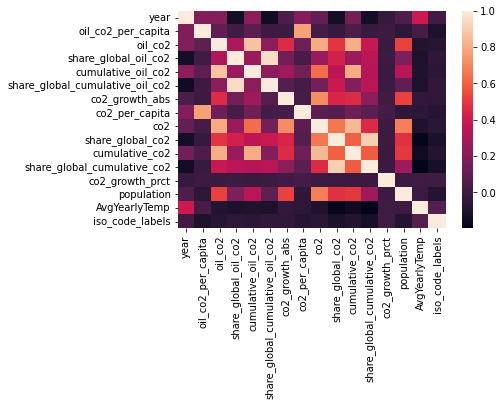

In [9]:
co2_corr = co2_df.corr()
sns.heatmap(co2_corr)

*   High correlation between cumulative_co2 and {oil_o2, cumulative_oil_co2}
*   High correlation between co2_per_capita and oil_co2_per_capita
*   Correlation between population and co2
*   Low correlation between AvgYearlyTemp and all features except year

In [10]:
combined_data_sec_2 = co2_le_df.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('/content/co2_le.csv')

# Modelling

In [11]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.
--2021-12-07 21:12:03--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  28.7MB/s    in 8.3s    

2021-12-07 21:12:12 (26.3 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 154 kB 47.2 MB/s 
     |████████████████████████████████| 110 

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [13]:
%load_ext sparkmagic.magics

In [14]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [15]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [16]:
train_sdf = spark.read.csv("/content/co2_le.csv", header=True, inferSchema=True)
train_sdf.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+
|  0|             53|1855|             0.001|0.03

In [17]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [18]:
train_sdf.columns

['_c0',
 'iso_code_labels',
 'year',
 'oil_co2_per_capita',
 'oil_co2',
 'share_global_oil_co2',
 'cumulative_oil_co2',
 'share_global_cumulative_oil_co2',
 'co2_growth_abs',
 'co2_per_capita',
 'co2',
 'share_global_co2',
 'cumulative_co2',
 'share_global_cumulative_co2',
 'co2_growth_prct',
 'population',
 'AvgYearlyTemp']

## All columns as features

In [19]:
columns_to_use = ['iso_code_labels','year','oil_co2_per_capita','oil_co2','share_global_oil_co2',
                  'cumulative_oil_co2','share_global_cumulative_oil_co2','co2_growth_abs',
                  'co2_per_capita','co2','share_global_co2','cumulative_co2',
                  'share_global_cumulative_co2','co2_growth_prct','population']

In [39]:
assembler = VectorAssembler(inputCols=columns_to_use, outputCol="features")

In [40]:
from pyspark.ml import Pipeline

modified_data_sdf = assembler.transform(train_sdf)
modified_data_sdf.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------

In [23]:
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed=24)

In [ ]:
# Training (1750 - 1950)
# Validation (1950 - 1980)
# Testing (1980 - 2013)

# Linear Regression

In [24]:
from pyspark.ml.regression import LinearRegression

# TODO define model
lr = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=5, regParam=0.3, elasticNetParam = 0.8)


# fit on training data
clfModel = lr.fit(train_sdf)

In [25]:
from pyspark.ml.evaluation import RegressionEvaluator

# prediction and evaluation
prediction = clfModel.transform(train_sdf)
evaluator = RegressionEvaluator()
evaluator.setPredictionCol('prediction')
evaluator.setLabelCol('AvgYearlyTemp')

RegressionEvaluator_1c19a77a4d36

In [26]:
training_accuracy = evaluator.evaluate(prediction)
test_prediction = clfModel.transform(test_sdf)
test_predictions_log = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})

print(training_accuracy)
print(test_predictions_log)

8.435235124440956
0.2294293862152943


In [27]:
# LASSO L1
lasso = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0.3, elasticNetParam = 1)
lassoModel = lasso.fit(train_sdf)
prediction = lassoModel.transform(train_sdf)
test_prediction = lassoModel.transform(test_sdf)
test_area_l1 = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})

# RIDGE L2 TO DO
ridge = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0.3, elasticNetParam = 0)
ridgeModel = ridge.fit(train_sdf)
prediction = ridgeModel.transform(train_sdf)
test_prediction = ridgeModel.transform(test_sdf)
test_area_l2 = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})

# Some variant of elastic net TO DO
elastic = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0.3, elasticNetParam = 0.8)
elasticModel = elastic.fit(train_sdf)
prediction = elasticModel.transform(train_sdf)
test_prediction = elasticModel.transform(test_sdf)
test_area_elastic = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})

In [28]:
print(test_area_l1, test_area_l2, test_area_elastic)

0.22808427457398306 0.24269430680152648 0.23112894786509108


# RandomForestRegressor

RandomForestClassifer, PCA
normalize using standardScalar

In [29]:
from pyspark.ml.regression import RandomForestRegressor

# TODO define model
rfc = RandomForestRegressor(featuresCol="features",labelCol="AvgYearlyTemp", maxDepth =5, numTrees=20)
# TODO fit on training data
rfModel = rfc.fit(train_sdf)


In [30]:
# TODO predictions
train_prediction = rfModel.transform(train_sdf)
test_prediction = rfModel.transform(test_sdf)

In [31]:
# TODO evaluate predictions
train_area = evaluator.evaluate(train_prediction, {evaluator.metricName: "r2"})
test_area = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})
print(train_area, test_area)

0.6186663893627045 0.6042772678734009


PCA

In [32]:
# TODO initialize a PCA model
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA

pca = PCA(k=6, inputCol="features", outputCol="pcaFeatures")

In [33]:
# Set up PCA
lr = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=5, regParam=0.3, elasticNetParam = 0.8)
# TODO Fit the model using the training data
pca_pipe = Pipeline(stages=[assembler,pca, lr])

In [34]:
# Get the PCA feature from the trained model
train_sdf = train_sdf.drop("features")
pca_model = pca_pipe.fit(train_sdf)

In [35]:
# Train a logistic regression model using the PCA features
train_prediction = pca_model.transform(train_sdf)

test_sdf = test_sdf.drop("features")
test_prediction = pca_model.transform(test_sdf)

In [36]:
# TODO evaluate predictions
training_pca = evaluator.evaluate(train_prediction, {evaluator.metricName: "r2"})
test_pca = evaluator.evaluate(test_prediction, {evaluator.metricName: "r2"})
print(training_pca, test_pca)

0.2174208150599808 0.2294293862152943


## Choosing main features

In [43]:
# remove duplicate columns
columns_to_use_2 = ['iso_code_labels','year','oil_co2','co2','co2_growth_prct','population']

In [45]:
assembler2 = VectorAssembler(inputCols=columns_to_use_2, outputCol="features")

In [46]:
from pyspark.ml import Pipeline

modified_data_sdf_2 = assembler2.transform(train_sdf)
modified_data_sdf_2.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------

In [48]:
train_sdf_2, test_sdf_2 = modified_data_sdf_2.randomSplit([0.8, 0.2], seed=24)

### Linear Regression

In [ ]:
# fit on training data
clfModel_2 = lr.fit(train_sdf_2)
prediction_2 = clfModel_2.transform(train_sdf_2)
training_accuracy_2 = evaluator.evaluate(prediction_2)
test_prediction_2 = clfModel.transform(test_sdf_2)
test_predictions_log_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})

print(training_accuracy_2)
print(test_predictions_log_2)

In [57]:
prediction

DataFrame[_c0: int, iso_code_labels: int, year: int, oil_co2_per_capita: double, oil_co2: double, share_global_oil_co2: double, cumulative_oil_co2: double, share_global_cumulative_oil_co2: double, co2_growth_abs: double, co2_per_capita: double, co2: double, share_global_co2: double, cumulative_co2: double, share_global_cumulative_co2: double, co2_growth_prct: double, population: double, AvgYearlyTemp: double, features: vector, prediction: double]

In [52]:
# LASSO L1
lassoModel_2 = lasso.fit(train_sdf_2)
prediction_2 = lassoModel_2.transform(train_sdf_2)
test_prediction_2 = lassoModel_2.transform(test_sdf_2)
test_area_l1_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})

# RIDGE L2
ridgeModel_2 = ridge.fit(train_sdf_2)
prediction_2 = ridgeModel_2.transform(train_sdf_2)
test_prediction_2 = ridgeModel_2.transform(test_sdf_2)
test_area_l2_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})

# elastic net
elasticModel_2 = elastic.fit(train_sdf_2)
prediction_2 = elasticModel_2.transform(train_sdf_2)
test_prediction_2 = elasticModel_2.transform(test_sdf_2)
test_area_elastic_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})

In [53]:
print(test_area_l1_2, test_area_l2_2, test_area_elastic_2)

0.1874450907659082 0.20111345447961526 0.19131870601871737


### RandomForestRegression

In [54]:
rfModel_2 = rfc.fit(train_sdf_2)
train_prediction_2 = rfModel_2.transform(train_sdf_2)
test_prediction_2 = rfModel_2.transform(test_sdf_2)
train_area_2 = evaluator.evaluate(train_prediction_2, {evaluator.metricName: "r2"})
test_area_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})
print(train_area_2, test_area_2)

0.531684981676612 0.5171556979857721


### PCA

In [55]:
train_sdf_2 = train_sdf_2.drop("features")
pca_model_2 = pca_pipe.fit(train_sdf_2)
train_prediction_2 = pca_model_2.transform(train_sdf_2)

test_sdf_2 = test_sdf_2.drop("features")
test_prediction_2 = pca_model_2.transform(test_sdf_2)
training_pca_2 = evaluator.evaluate(train_prediction_2, {evaluator.metricName: "r2"})
test_pca_2 = evaluator.evaluate(test_prediction_2, {evaluator.metricName: "r2"})
print(training_pca_2, test_pca_2)


0.21743975848854913 0.21821522925338754
